# Filtering
## Simple First-order Case First

In [15]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material
try:
    from control.matlab import *
except:
    !python3 -m pip install control
    from control.matlab import *
    
import cmath

Running Python: 3.8.19
Running Sympy: 1.12.1


In [16]:
f_d = 1/2/np.pi #             % input freq Hz
t = np.linspace(0,30,1000) #            % simulation time
omega = np.logspace(-2,2,1000) #   % frequency 
# define P as a transfer function
P = tf([1],[1, 1])
P

TransferFunction(array([1]), array([1, 1]))

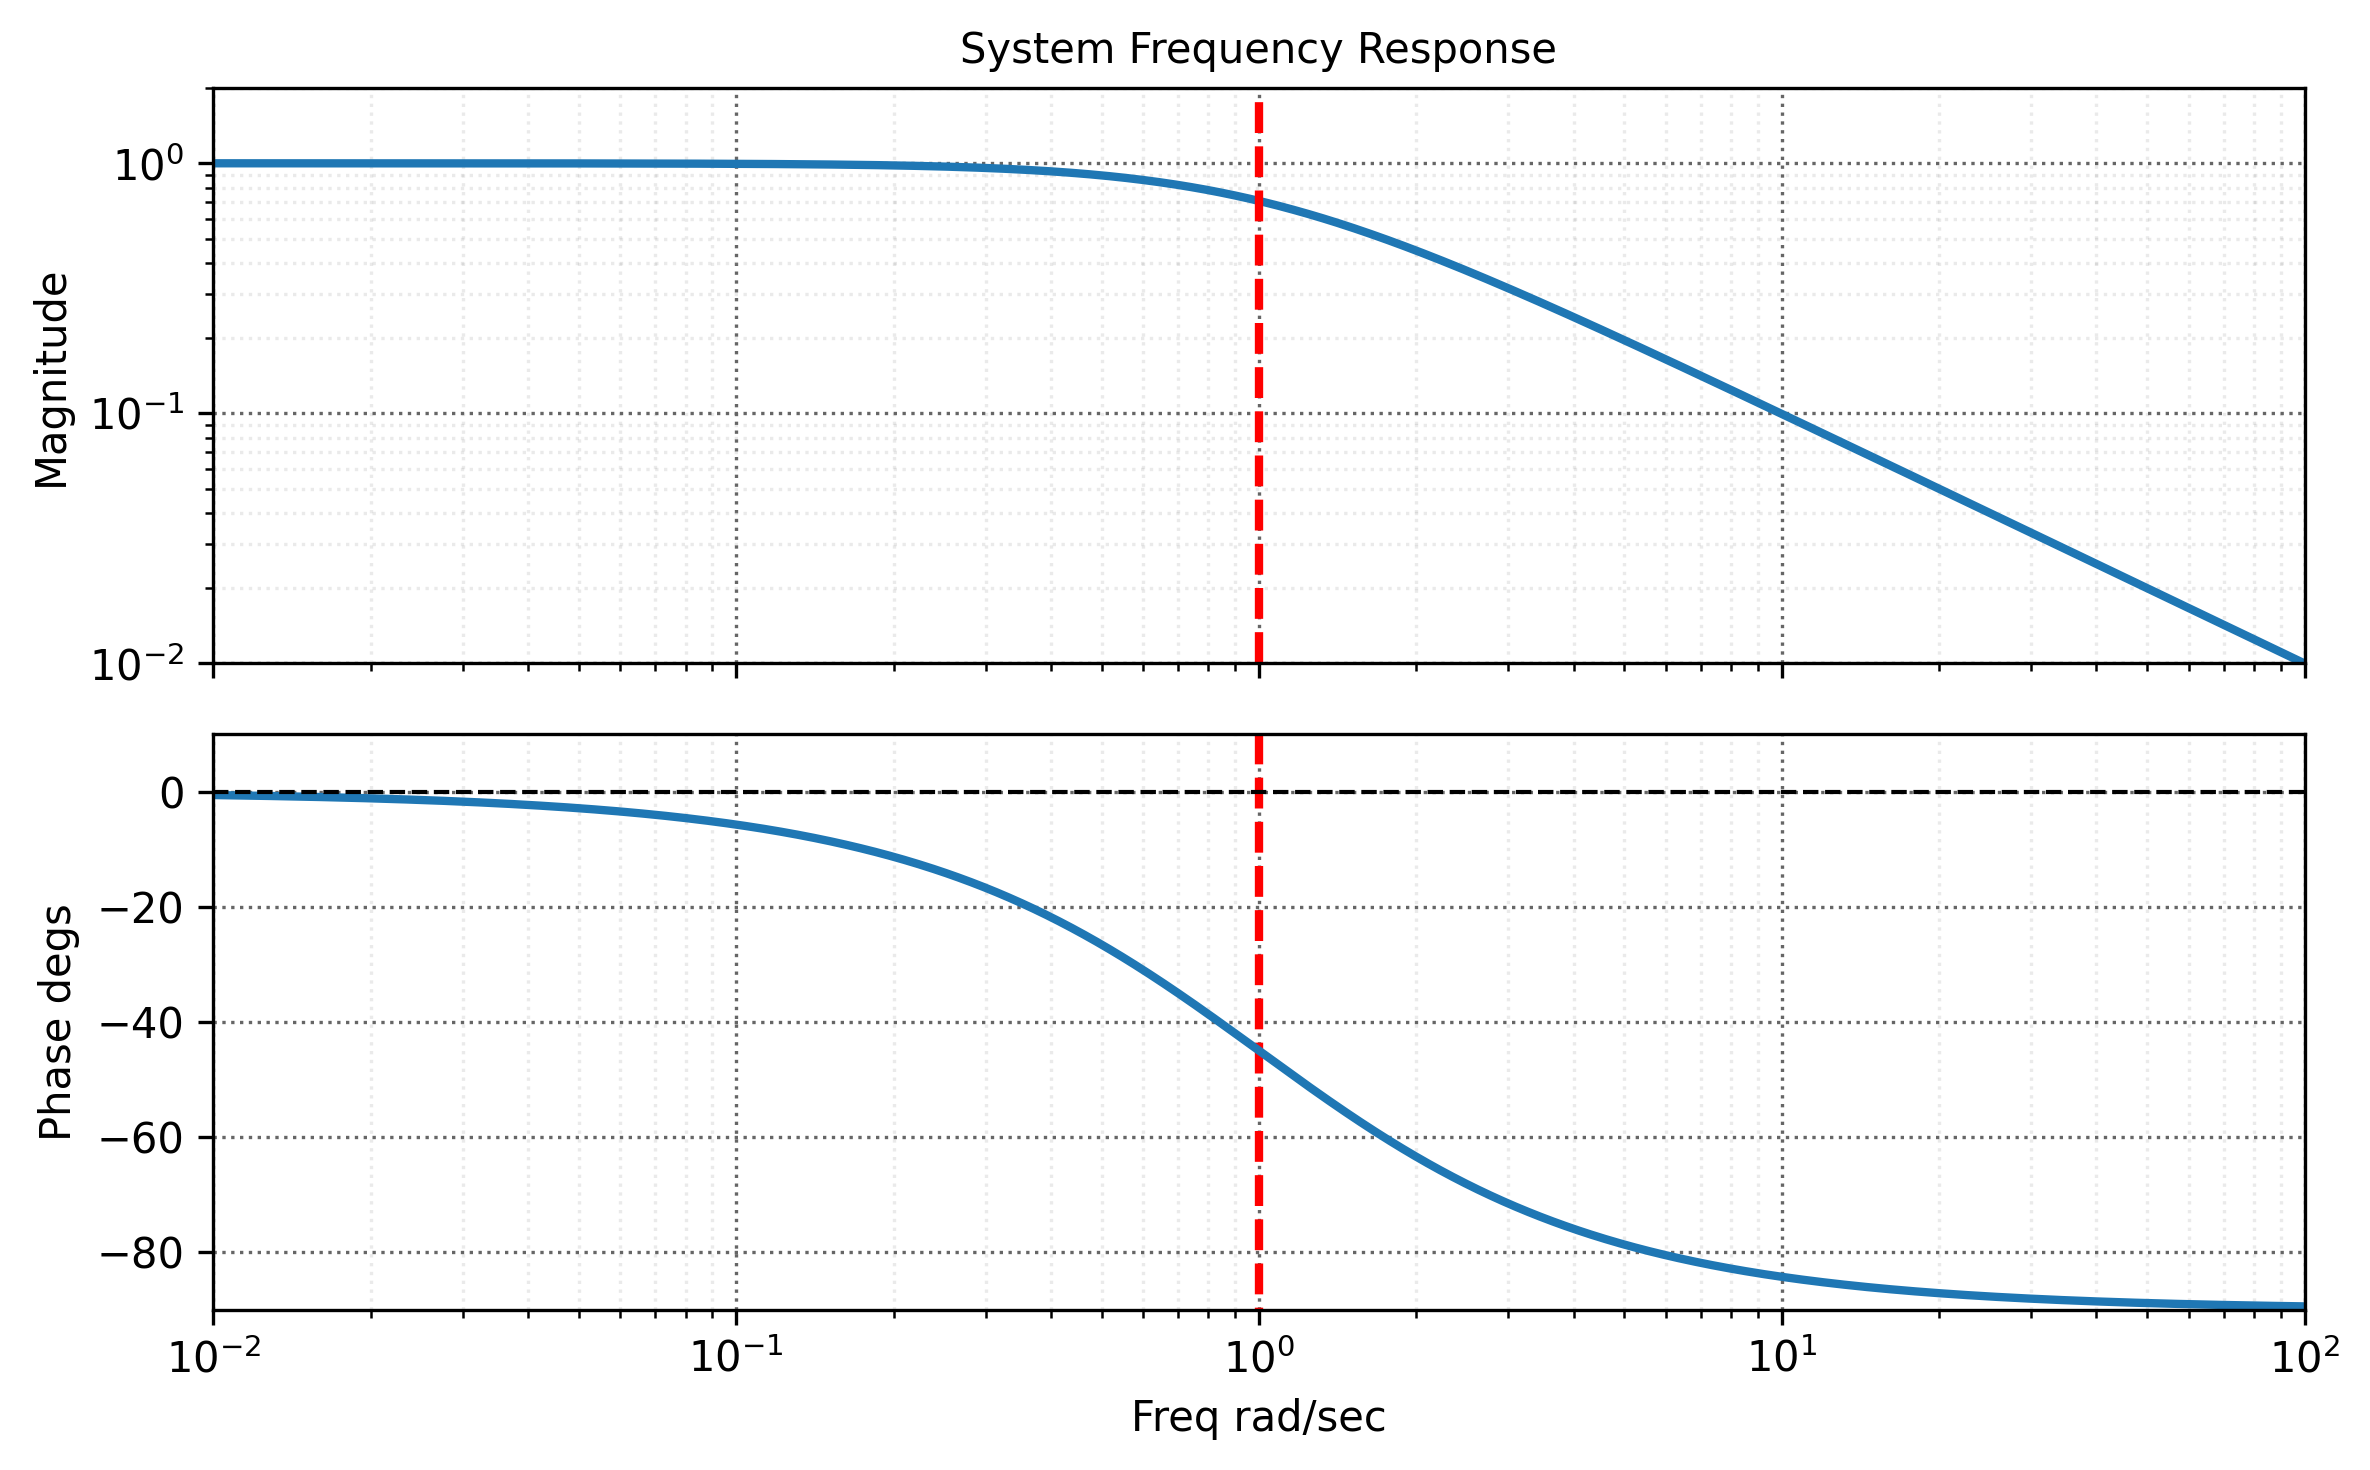

In [17]:
gain, phase, w = bode(P, omega,plot=False)
fig, (ax1, ax2) = plt.subplots(2,figsize=(8,5), dpi=300, sharex = True)
ax1.set_title('System Frequency Response')
ax1.loglog(w, gain)
ax1.vlines(f_d*2*np.pi,.01,2,colors='r',ls='dashed')
ax2.vlines(f_d*2*np.pi,-190,10,colors='r',ls='dashed')
ax2.semilogx(w, phase*r2d)
ax2.set_xlabel('Freq rad/sec')
ax2.set_ylabel('Phase degs')
ax1.set_ylabel('Magnitude')
nicegrid(ax1)
nicegrid(ax2)
ax1.set_ylim([.01,2])
ax2.set_ylim([-90,10])
fig.savefig('./figs/T7_e22_1.pdf',  format='pdf', dpi=300)
plt.show()

In [18]:
# for plotting
II = np.argwhere(np.abs(omega-f_d*2*np.pi) < 1e-2)[0]
Shift_values = [abs(gain[II]), phase[II]]            # ampl and phase shift      

In [19]:
w = np.sin(f_d*2*np.pi*t);                            # input
wshift = Shift_values[0]*np.sin(f_d*2*np.pi*t + Shift_values[1]);   # shifted input
y,t,xout = lsim(P,w,t,0)                  # simulated output

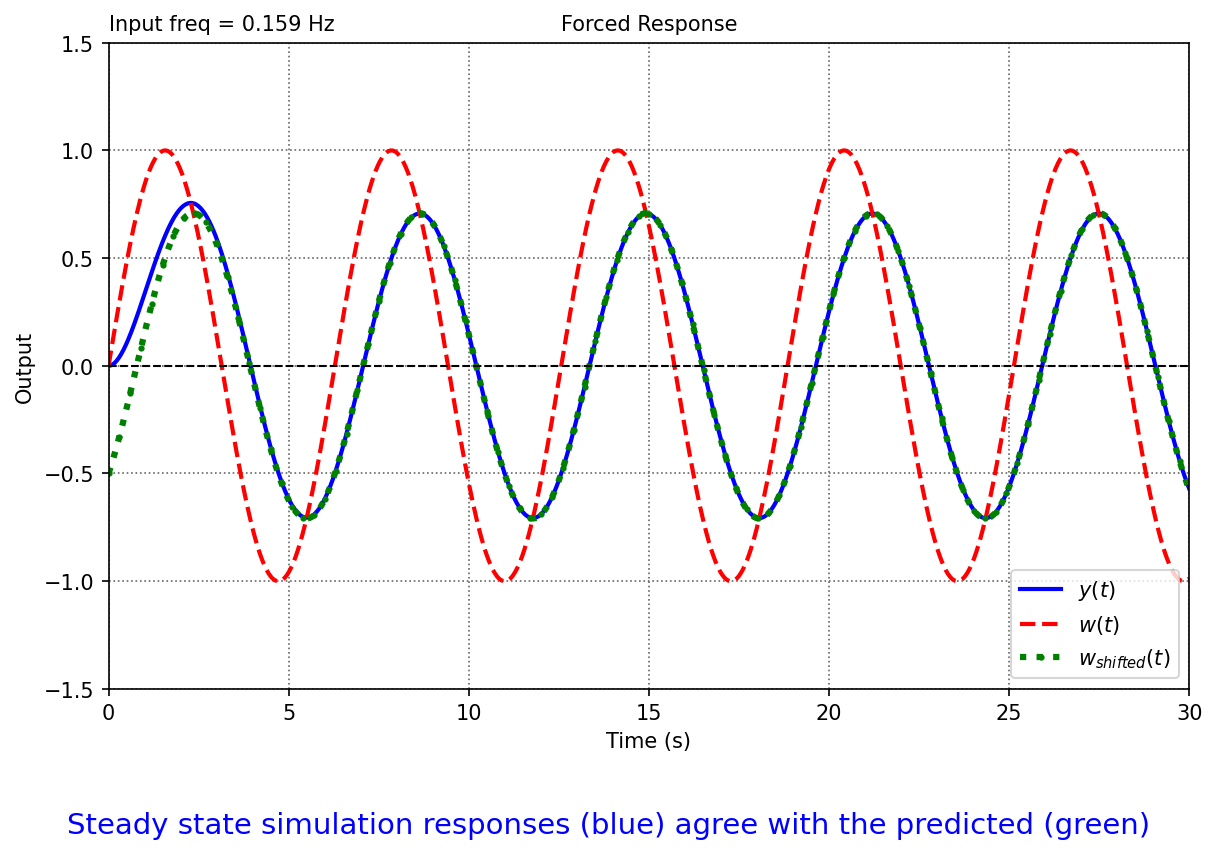

In [20]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y,'b-',label='$y(t)$')
plt.plot(t,w,'r--',label='$w(t)$')
plt.plot(t,wshift,'go:',label='$w_{shifted}(t)$',lw=3,ms=2,markevery=10)
nicegrid()
plt.legend()
plt.xlim(0,max(t))
plt.ylim(-1.5,1.5)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Forced Response')
plt.title('Input freq = '+str(np.round(f_d,3))+' Hz',loc='left')
caption("Steady state simulation responses (blue) agree with the predicted (green)",fig)
fig.savefig('./figs/T7_e22_2.pdf', format='pdf', dpi=300)
plt.show()

# Section 7.17 - Second Order System

In [21]:
M = 1
K = 2
B = 0.1
f_d = 1.5/2/np.pi #             % input freq Hz
t = np.linspace(0,80,5000) #            % simulation time
omega = np.logspace(-1,1,1000) #   % frequency 

In [22]:
# define P as a transfer function
P = tf([0, 1],[M, B, K])
gain, phase, w = bode(P, omega, plot=False)

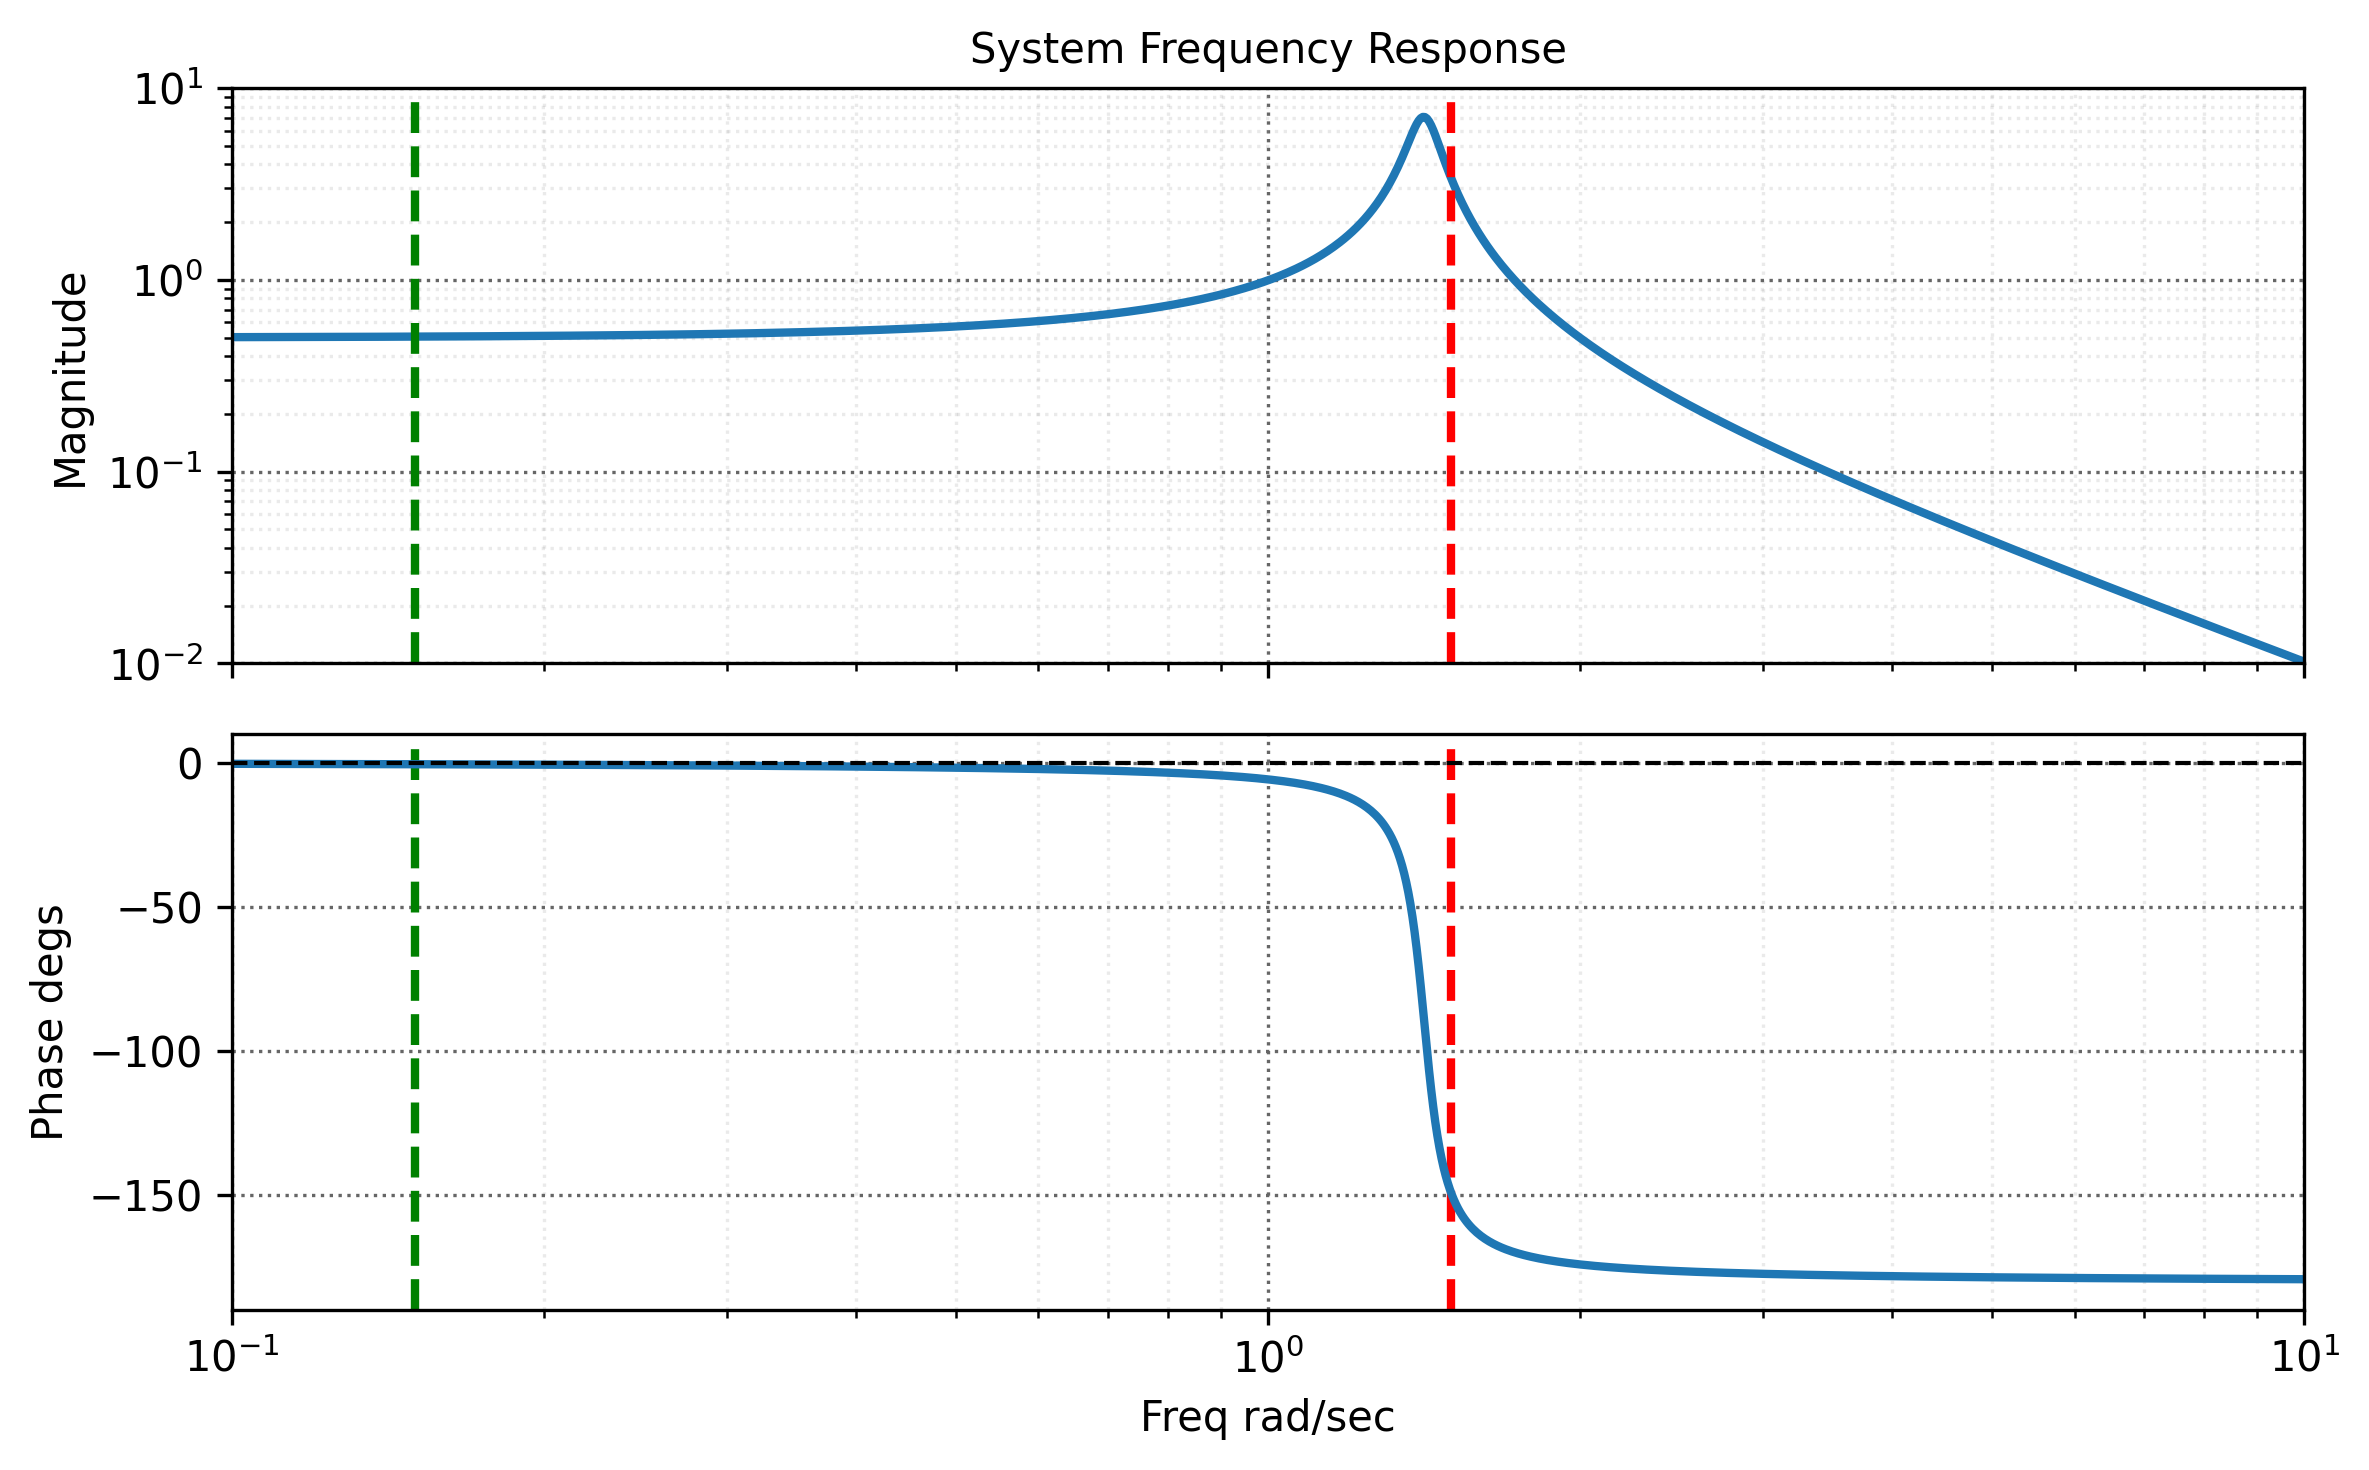

In [23]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(8,5), dpi=300, sharex = True)
ax1.set_title('System Frequency Response')
ax1.loglog(w, gain)
ax1.vlines(f_d*2*np.pi,.01,10,colors='r',ls='dashed')
ax2.vlines(f_d*2*np.pi,-190,10,colors='r',ls='dashed')
ax1.vlines(f_d*2*np.pi/10,.01,10,colors='g',ls='dashed')
ax2.vlines(f_d*2*np.pi/10,-190,10,colors='g',ls='dashed')
ax2.semilogx(w, phase*r2d)
ax2.set_xlabel('Freq rad/sec')
ax2.set_ylabel('Phase degs')
ax1.set_ylabel('Magnitude')
nicegrid(ax1)
nicegrid(ax2)
ax1.set_ylim([.01,10])
ax2.set_ylim([-190,10])
fig.savefig('./figs/T7_s17_1.pdf',  format='pdf', dpi=300)
plt.show()

In [24]:
# for plotting
II0 = np.argwhere(np.abs(omega-f_d*2*np.pi) < 1e-2)[0]
II1 = np.argwhere(np.abs(omega-f_d*2*np.pi/10) < 1e-2)[0]
Shift_values = [abs(gain[II0]), phase[II0], abs(gain[II1]), phase[II1]]            # ampl and phase shift      

In [25]:
w0 = np.sin(f_d*2*np.pi*t);                            # input
w0shift = Shift_values[0]*np.sin(f_d*2*np.pi*t + Shift_values[1]);   # shifted input
y0,t0,xout = lsim(P,w0,t,0)                  # simulated output

w1 = np.sin(f_d/10*2*np.pi*(t));                            # input
w1shift = Shift_values[2]*np.sin(f_d/10*2*np.pi*t + Shift_values[3]);   # shifted input
y1,t1,xout = lsim(P,w1,t,0)                  # simulated output

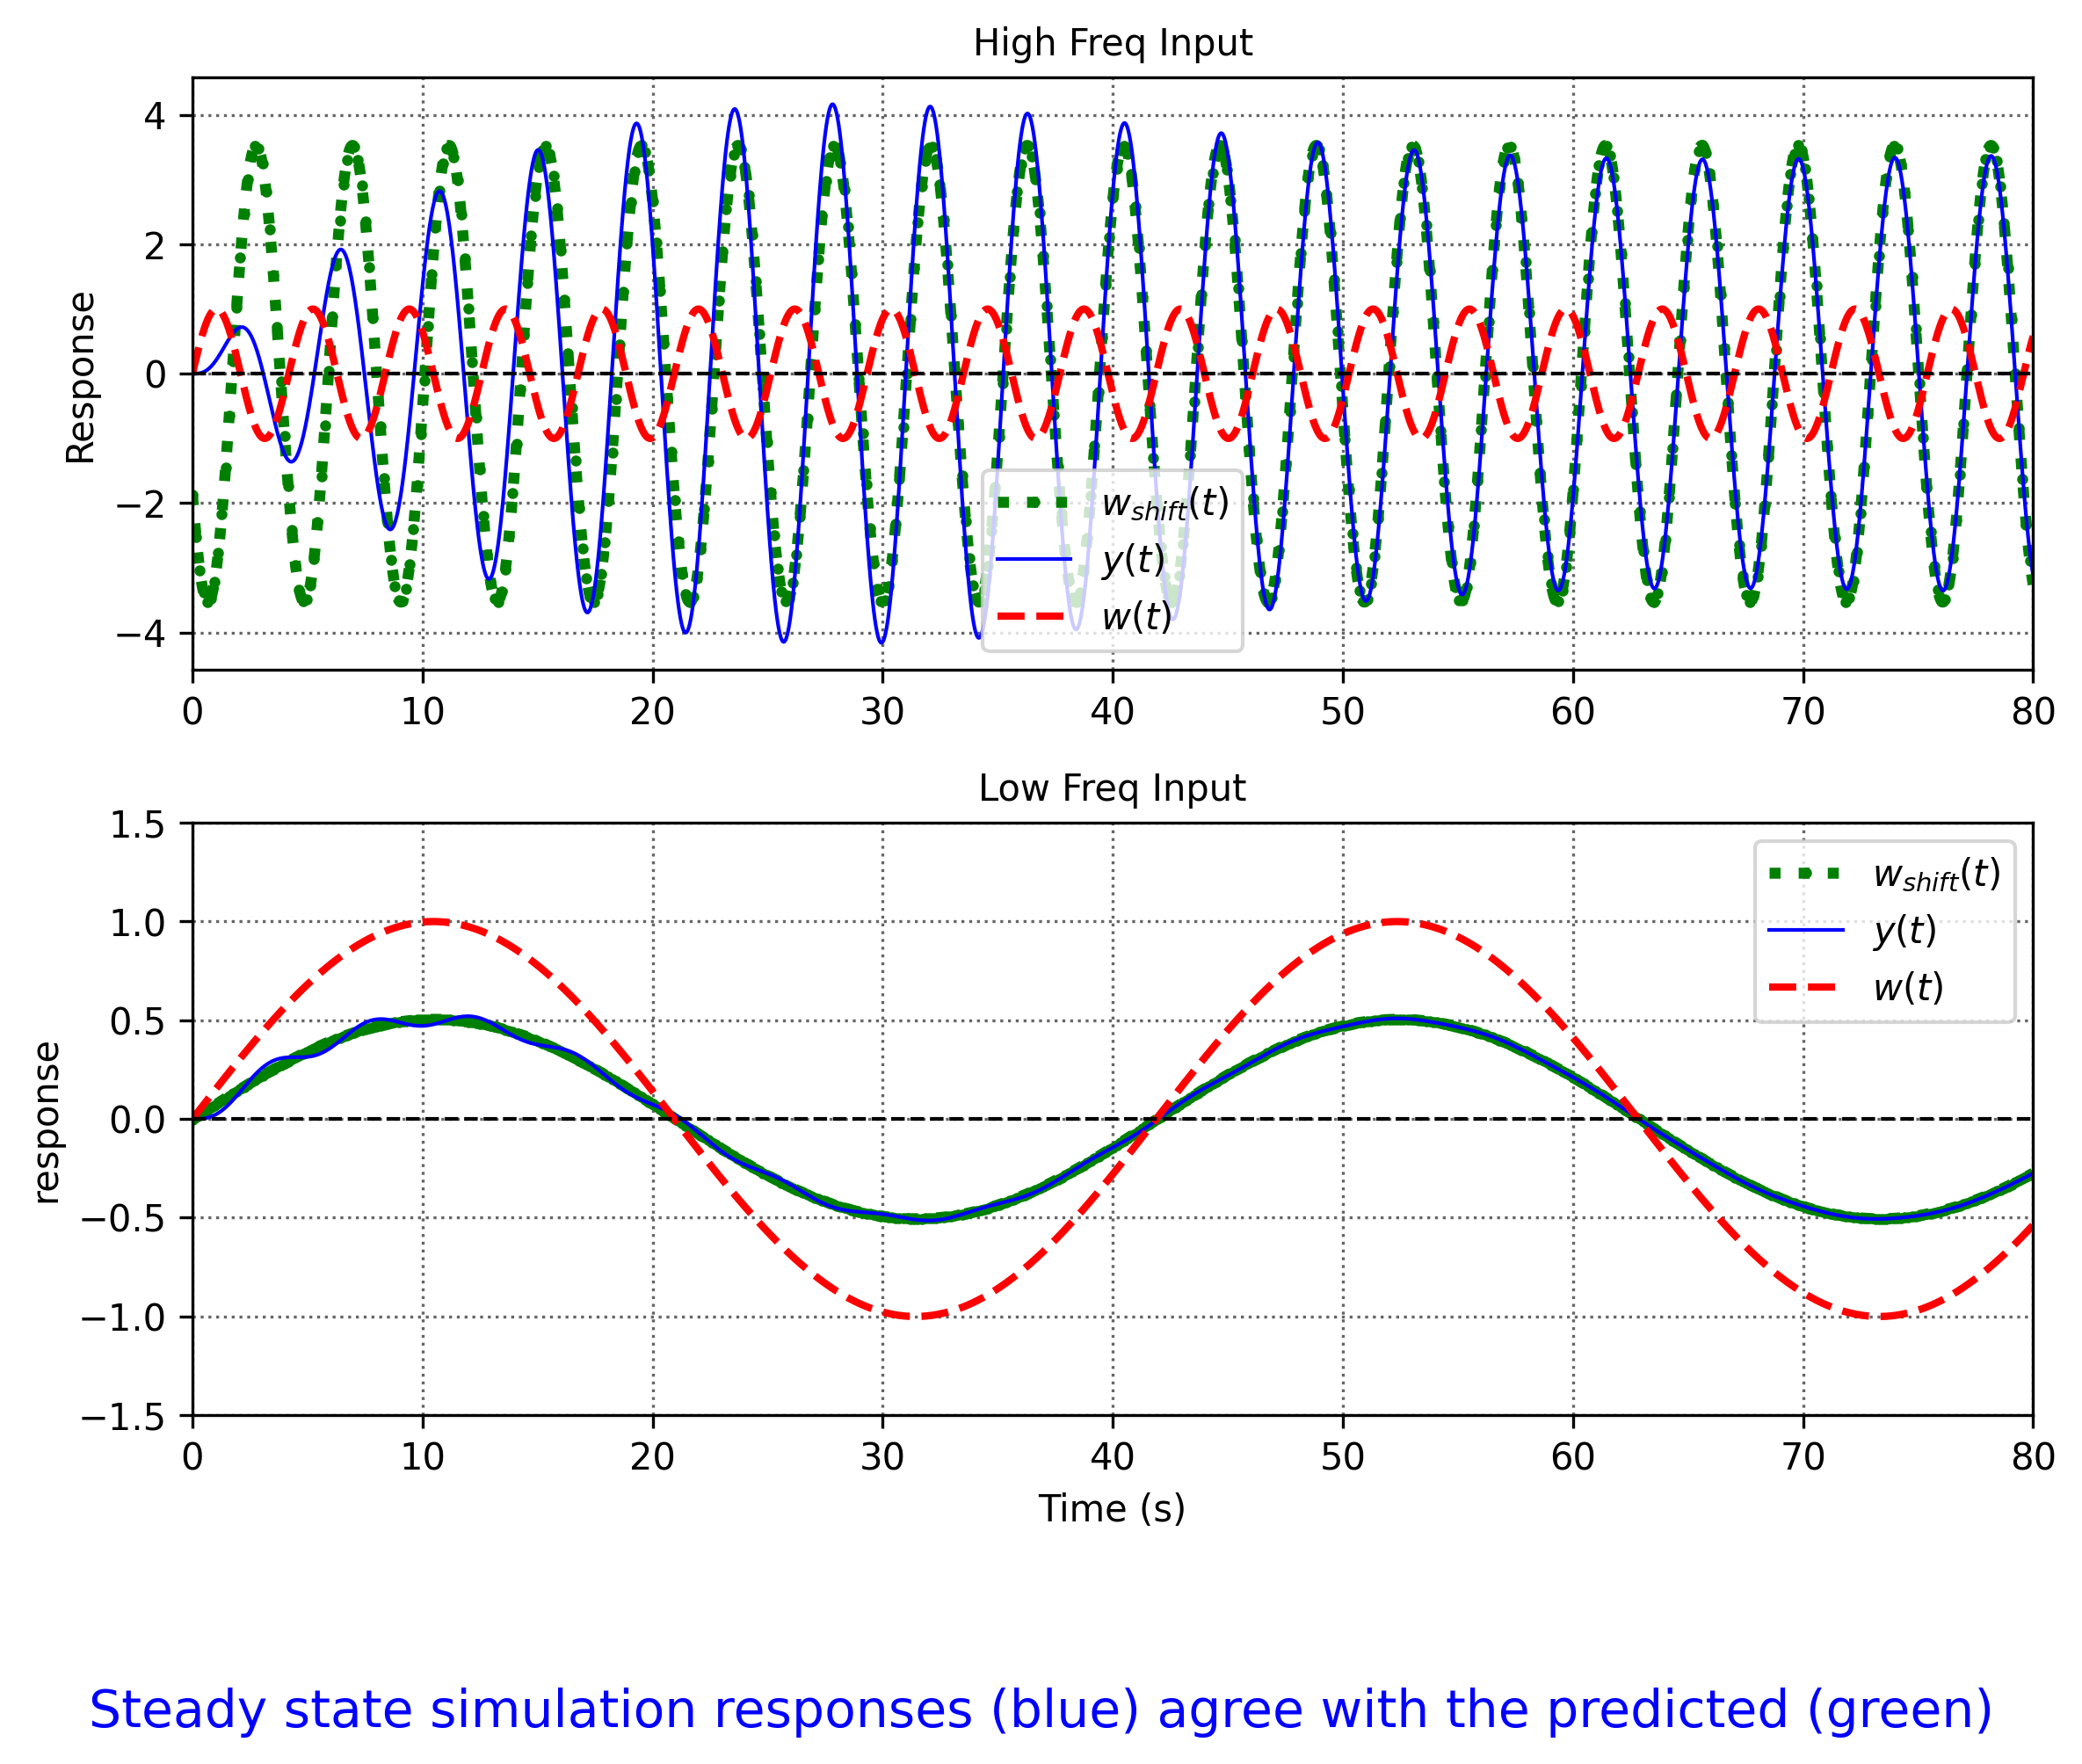

In [26]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(8,6), dpi=300)
ax1.plot(t0,w0shift,'go:',label='$w_{shift}(t)$',lw=3,ms=2,markevery=10)
ax1.plot(t0,y0,'b-',label='$y(t)$',lw=1)
ax1.plot(t0,w0,'r--',label='$w(t)$')
nicegrid(ax1)
ax2.plot(t1,w1shift,'go:',label='$w_{shift}(t)$',lw=3,ms=2,markevery=10)
ax2.plot(t1,y1,'b-',label='$y(t)$',lw=1)
ax2.plot(t1,w1,'r--',label='$w(t)$')
nicegrid(ax2)

ax1.legend(loc=8)
ax2.legend()
ax1.set_xlim(0,max(t))
ax1.set_title('High Freq Input')
ax2.set_title('Low Freq Input')
plt.ylim(-1.5,1.5)
ax1.set_ylabel('Response')
ax2.set_ylabel('response')
ax2.set_xlabel('Time (s)')
caption("Steady state simulation responses (blue) agree with the predicted (green)",fig)
fig.savefig('./figs/T7_s17_2.pdf',  format='pdf', dpi=300)
plt.show()